In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

from common_functions import foo


mpl.style.use('classic')

%load_ext autoreload
%autoreload 2

results = "results"

In [2]:
from common_functions import latexify, format_axes, tableau20blind
latexify(14, 8)

In [15]:
df = foo(lastKDays, results, True)
df.groupby(["reg"]).mean()

,kout,kin,day,rmse,lastKDays,seed
reg,,,,,,
gp,2.498016,2.001424,163.983420,20.665598,30.0,-1.000000
gp_rd,2.499959,1.999573,163.968984,24.380714,30.0,2.000305
knn,2.500000,2.000000,164.000000,30.679426,30.0,-1.000000
knn_rd,2.500000,2.000000,164.000000,30.541583,30.0,2.000000
qbc,2.500000,2.000000,164.000000,22.671395,30.0,-1.000000
qbc_rd,2.500000,2.000000,164.000000,24.136366,30.0,2.000000


In [3]:
splits = 6
dic = {}
for lastKDays in [30]:
    tdic = {}
    df = foo(lastKDays, results, True)
    days = df['day'].unique()
    for ix, tempdf in df.groupby(["kout", "kin"]):
        for reg_comp in ["qbc", "knn", "qbc_rd", "gp_rd", "knn_rd"]:
            comp = reg_comp
#             try:
            a =  tempdf[tempdf["reg"] == 'gp']["rmse"].values
            if sum(np.isnan(a)) != 0:
                raise ValueError
            b = tempdf[tempdf["reg"] == reg_comp]["rmse"].values
#             print (b)
            if sum(np.isnan(b)) != 0:
                raise ValueError
            a = a.mean()
            b = b.mean()
            if a <= b:
                temp = tdic.get(comp, [0, 0])
                tdic[comp] = [temp[0] + 1, temp[1]]
            else:
                temp = tdic.get(comp, [0, 0])
                tdic[comp] = [temp[0], temp[1] + 1]
#             except Exception as e:
#                 print (e)
#                 continue
    print ("lastKDays Done: ", lastKDays)
    dic[f"lastKDays_{lastKDays}"] = tdic

lastKDays Done:  30


In [4]:
dic

{'lastKDays_30': {'qbc': [25, 5],
  'knn': [29, 1],
  'qbc_rd': [26, 4],
  'gp_rd': [24, 6],
  'knn_rd': [30, 0]}}

In [5]:
new_dic = {
    'lastKDays': [],
    'knn': [],
    'knn_rd': [],
    'qbc': [],
    'qbc_rd': [],
    'gp_rd': [],
}
for ls, di in dic.items():
    new_dic['lastKDays'].append(ls)
    new_dic['knn'].append(tuple(di['knn']))
    new_dic['knn_rd'].append(tuple(di['knn_rd']))
    new_dic['qbc'].append(tuple(di['qbc']))
    new_dic['qbc_rd'].append(tuple(di['qbc_rd']))
    new_dic['gp_rd'].append(tuple(di['gp_rd']))

In [6]:
win_loss = pd.DataFrame(new_dic)
win_loss

,lastKDays,knn,knn_rd,qbc,qbc_rd,gp_rd
0,lastKDays_30,"(29, 1)","(30, 0)","(25, 5)","(26, 4)","(24, 6)"


In [7]:
dic = {
    "lastKDays": [] ,
    "best_ix": [] ,
    "worst_ix": [] ,
    "comp": [],
}
try:
    win_loss_plots = pd.read_csv("win_loss_plots_combine.csv")
except:
    for comp in ["qbc", "qbc_rd", "gp_rd", 'knn', 'knn_rd']:
        splits = 6
        import sys
        max_err = sys.maxsize
        min_err = - sys.maxsize
        for lastKDays in [30]:
            tdic = {}
            df = foo(lastKDays, results, True)
            days = df['day'].unique()
            best_ratio = 0
            worst_ratio = 1
            best_ix = None
            worst_ix = None
            for ix, tempdf in df.groupby(["kout", "kin"]):
                gp_win = 0
                gp_loose = 0
                for jx, tempdf1 in tempdf.groupby("day"):
                    a = tempdf1[tempdf1["reg"] == 'gp']["rmse"]
                    b = tempdf1[tempdf1["reg"] == comp]["rmse"]
                    if (a.shape[0] != 0 and b.shape[0] != 0):
                        a = a.mean()
                        b = b.mean()
                    else:
                        print (f"{jx}th Day did not have values for both")
                        continue

                    
                    if a <= b:
                        gp_win += 1
                    else:
                        gp_loose += 1

                win_ratio = float(gp_win)/(gp_loose + gp_win)
                if best_ratio < win_ratio:
                    best_ratio = win_ratio
                    best_ix = ix
                if worst_ratio > win_ratio:
                    worst_ratio = win_ratio
                    worst_ix = ix
            print (comp, "lastKDays Done: ", lastKDays)
            dic["lastKDays"].append(lastKDays)
            dic["best_ix"].append(best_ix)
            dic["worst_ix"].append(worst_ix)
            dic["comp"].append(comp)
            
    win_loss_plots = pd.DataFrame(dic)


In [8]:
win_loss_plots.to_csv("win_loss_plots_combine.csv", index = None)
win_loss_plots["best_ix"].values
win_loss_plots
win_loss_plots = pd.read_csv("win_loss_plots_combine.csv")
win_loss_plots

,lastKDays,best_ix,worst_ix,comp
0,30,"(2, 4)","(5, 1)",qbc
1,30,"(0, 2)","(5, 1)",qbc_rd
2,30,"(0, 3)","(0, 0)",gp_rd
3,30,"(0, 2)","(1, 1)",knn
4,30,"(0, 3)","(5, 1)",knn_rd


In [9]:
params = {
    'lines.linewidth': 2,
    'lines.color': 'k',
#     'boxplot.boxprops.linewidth': 20,
    'boxplot.boxprops.color': 'k',
    'patch.linewidth': 3,
    'legend.fontsize': 14 + 4,
    'legend.framealpha': .6,
    'axes.titlesize': 14 + 4,
    "axes.labelsize": 14 + 4,
    'xtick.labelsize': 14 + 4,
    'ytick.labelsize': 16 + 4,
#     'axes.labelweight': 'bold',
    'axes.linewidth': 2,
#     'font.weight': 'bold'
    
}
matplotlib.rcParams.update(params)

In [10]:
lastPlotDay = 125

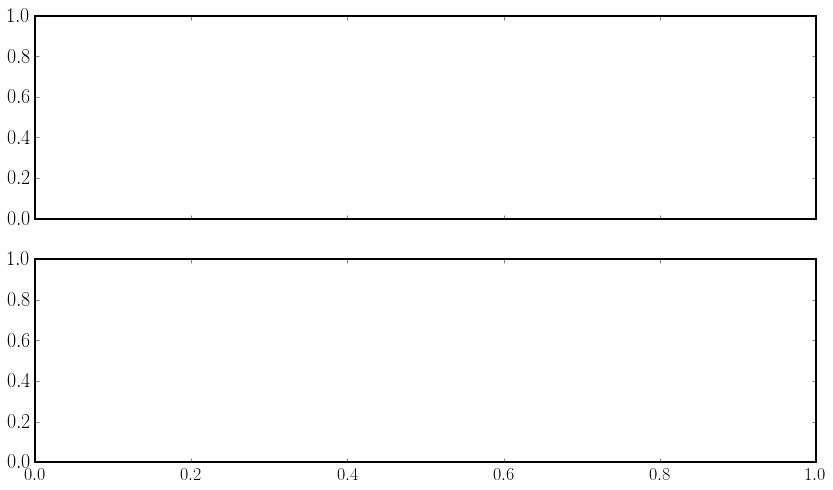

In [11]:
axs = plt.subplots(nrows=2, sharex=True);


(2, 4) (5, 1)


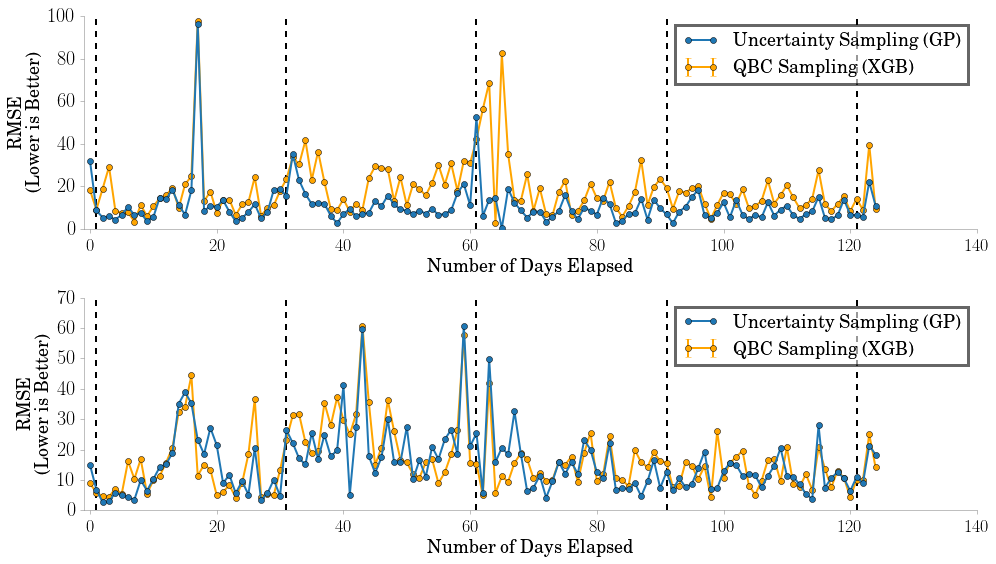

(0, 2) (5, 1)


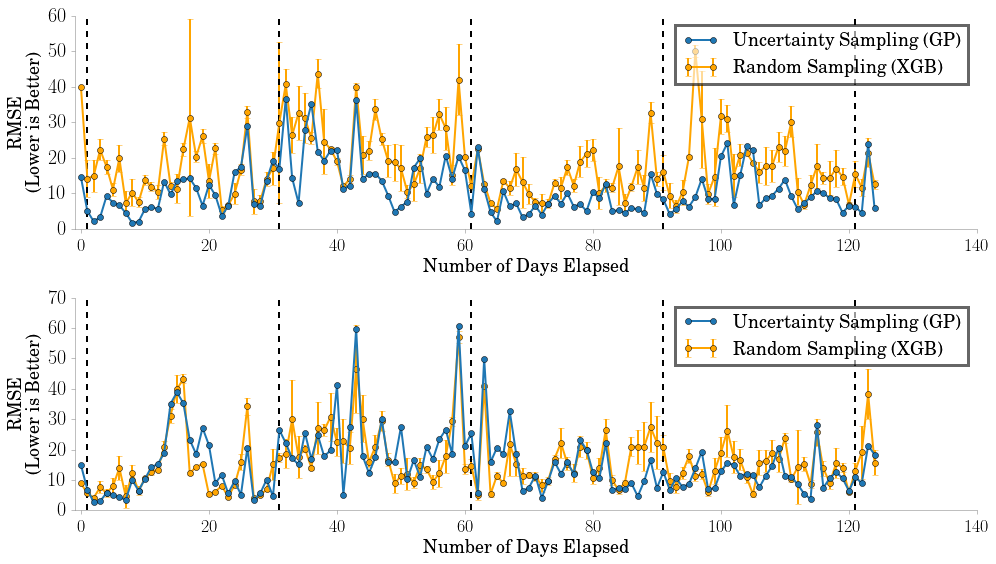

(0, 3) (0, 0)


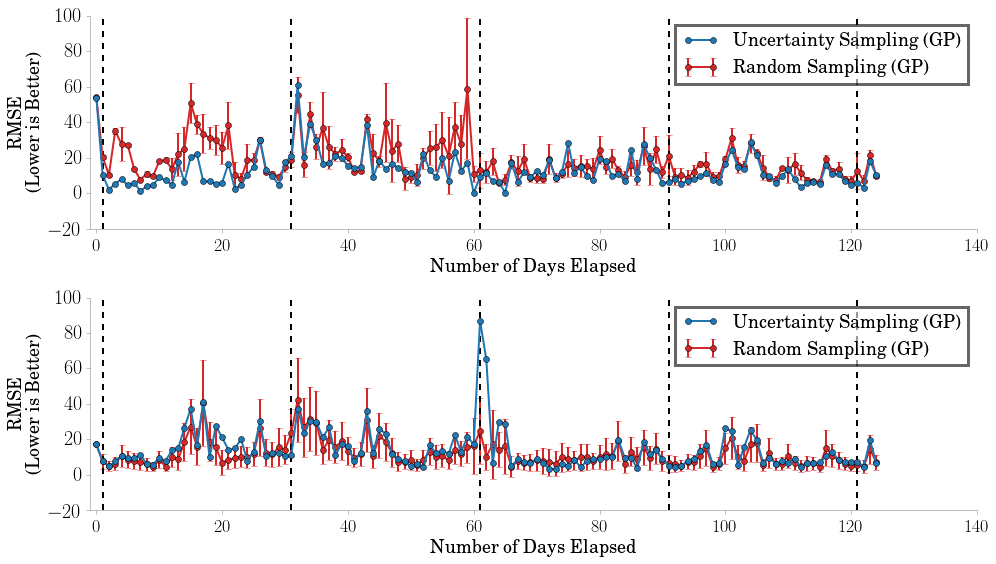

(0, 2) (1, 1)


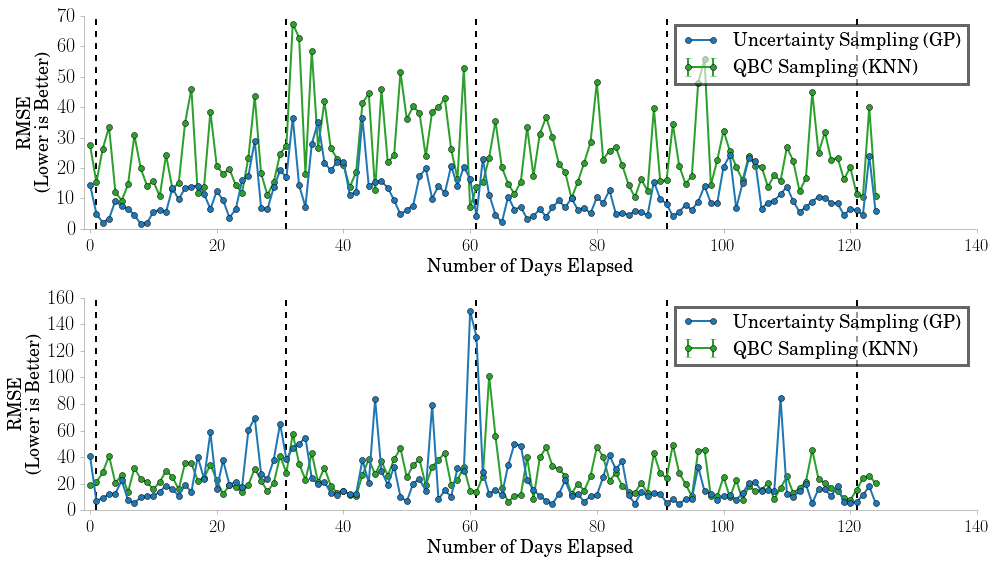

(0, 3) (5, 1)


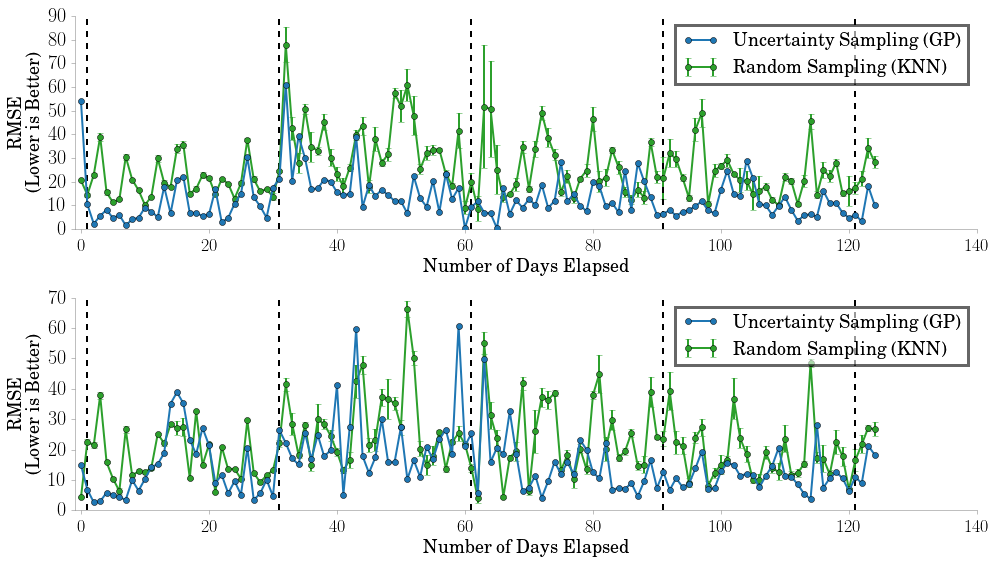

In [13]:

for scomp, comp in zip([
    "QBC Sampling (XGB)", 
    "Random Sampling (XGB)", 
    "Random Sampling (GP)", 
    "QBC Sampling (KNN)", 
    "Random Sampling (KNN)"
],
                       [
    "qbc", "qbc_rd", "gp_rd", "knn", "knn_rd"
]):
    for k, temp_df in win_loss_plots.groupby("lastKDays"):
        if k != 30:
            continue
        df = foo(k, results, True)
        hello = win_loss_plots[(win_loss_plots['comp']==comp) & (win_loss_plots['lastKDays']==k)]
        best_ix, worst_ix = hello[["best_ix", "worst_ix"]].values[0]
        best_ix = tuple(map(int, best_ix[1:-1].split(", ")))
        worst_ix = tuple(map(int, worst_ix[1:-1].split(", ")))
        print (best_ix, worst_ix)
        fig, axs = plt.subplots(nrows=2, sharex=True)
        for ax_num, some_ix, s in zip([0,1], [best_ix, worst_ix], ["Best", "Worst"]):
            yoyo_df = df[(df['kout'] == some_ix[0]) & (df['kin'] == some_ix[1])]# contains comp and gp
            
            gp_days = yoyo_df[yoyo_df["reg"] == 'gp']["day"].values
            gp_mean = []
            for gp_day in gp_days:
                rela = yoyo_df[(yoyo_df["reg"] == 'gp') & (yoyo_df["day"] == gp_day)]["rmse"]
                gp_mean.append(rela.mean())
#                 gp_mean.append(rela.mean())
                
            comp_days = yoyo_df[yoyo_df["reg"] == comp]["day"].unique()
            comp_mean = []
            comp_std = []
            for comp_day in comp_days:
                rela = yoyo_df[(yoyo_df["reg"] == comp) & (yoyo_df["day"] == comp_day)]["rmse"]
                comp_mean.append(rela.mean())
                comp_std.append(rela.std())     
            
            arr = [(d, m, s) for d, m, s in zip(comp_days, comp_mean, comp_std)]
            arr.sort(key=lambda x:x[0])
            
            if "KNN" in scomp:
                color = tableau20blind[4]
            elif "XGB" in scomp:
                color = "orange"
            else:
                color = tableau20blind[6]
            
            axs[ax_num].errorbar(
                [a[0] for a in arr][:lastPlotDay], 
                [a[1] for a in arr][:lastPlotDay],
                yerr = [a[2] for a in arr][:lastPlotDay], 
                label=scomp,
                marker="o",
                c=color,
            )
            
            arr = [(d, m) for d, m in zip(gp_days, gp_mean)]
            arr.sort(key=lambda x:x[0])
        
            axs[ax_num].plot(
                [a[0] for a in arr][:lastPlotDay], 
                [a[1] for a in arr][:lastPlotDay],
                label="Uncertainty Sampling (GP)",
                marker="o",
                zorder=10
            )
            
            for x in range(1, lastPlotDay, 30):
                axs[ax_num].axvline(
                    x=x, 
                    linestyle='--',
                )

            axs[ax_num].set_ylabel("RMSE\n(Lower is Better)")
            axs[ax_num].set_xlabel("Number of Days Elapsed")
            axs[ax_num].legend(loc="upper right").set_zorder(20)
            axs[ax_num].set_xlim(-1)
            format_axes(axs[ax_num])
        fig.tight_layout()
        plt.savefig(f"plts/{'_'.join(scomp.split())}_{lastKDays}.pdf")
        plt.show()